# Bacteria Biotope 2019 charts 

In [1]:
import pygal                                                       
from IPython.display import SVG, display, HTML
from pygal.style import Style, RotateStyle
import cairosvg

In [2]:
custom_style = RotateStyle('#2980b9',
    background='transparent',
    font_family='Helvetica',
    label_font_size=20,
    legend_font_size=20,
    major_label_font_size=20,
    value_font_size=20,
    title_font_size=20,
    value_label_font_size=20,
    opacity='.8',
    opacity_hover='.9',
    transition='400ms ease-in')

## Train, Dev, Test

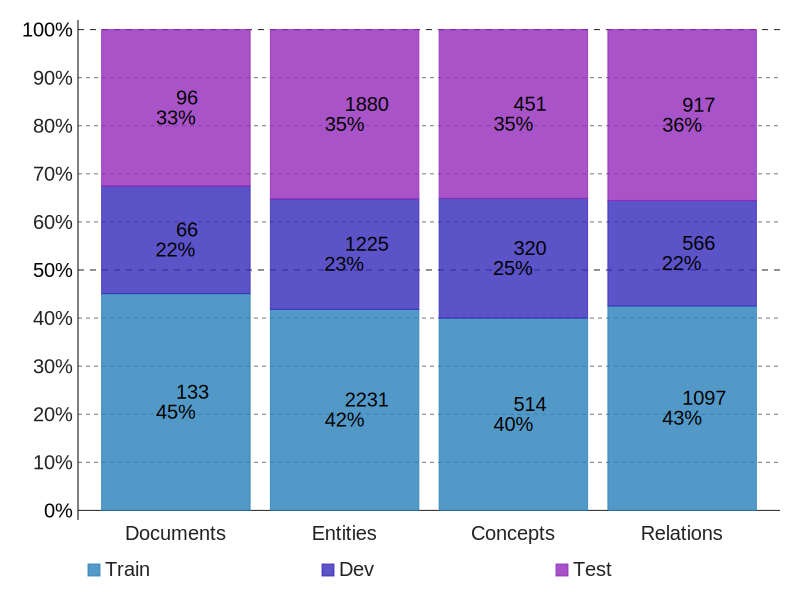

In [3]:
# columns = Documents, Entities, Concepts, Relations

train = [133, 2231, 514, 1097]
dev = [66, 1225, 320, 566]
test = [96, 1880, 451, 917]
tdt = [295, 5336, 1285, 2580]

train_percent = [{'value' : 100*a/b, 'label' : str(a)} for a,b in zip(train,tdt)]
dev_percent = [{'value' : 100*a/b, 'label' : str(a)} for a,b in zip(dev,tdt)]
test_percent = [{'value' : 100*a/b, 'label' : str(a)} for a,b in zip(test,tdt)]

bar_chart = pygal.StackedBar(print_values=True, print_labels=True, value_formatter=lambda x: "%.0f" % x + "%", 
                             style=custom_style, legend_at_bottom=True, legend_at_bottom_columns=3)

bar_chart.x_labels = ['Documents', 'Entities', 'Concepts', 'Relations']
bar_chart.add('Train', train_percent, formatter=lambda x: "%.0f" % x + "%")  
bar_chart.add('Dev', dev_percent, formatter=lambda x: "%.0f" % x + "%")
bar_chart.add('Test', test_percent, formatter=lambda x: "%.0f" % x + "%")

bar_chart.render_to_file('train_dev_test_chart.svg')                         

display(SVG(bar_chart.render(disable_xml_declaration=True)))

cairosvg.svg2pdf(url='train_dev_test_chart.svg', write_to='train_dev_test_chart.pdf')


## Nested and Discontinuous entities

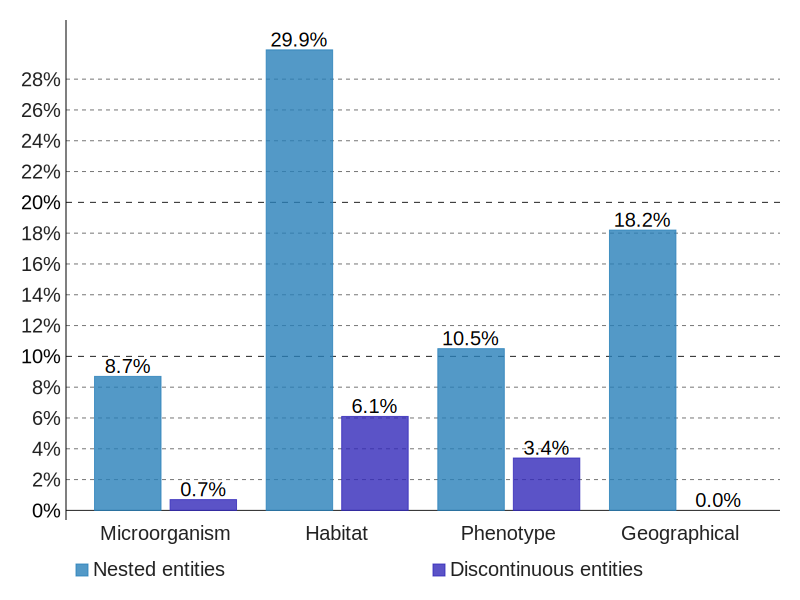

In [4]:
nested = [8.7, 29.9, 10.5, 18.2]
discontinuous = [0.7, 6.1, 3.4, 0.0]

bar_chart = pygal.Bar(print_values=True, value_formatter=lambda x: "%.0f" % x + "%", style=custom_style,
                             legend_at_bottom=True, legend_at_bottom_columns=2, print_values_position='top')

bar_chart.x_labels = ['Microorganism', 'Habitat', 'Phenotype', "Geographical"]
bar_chart.add('Nested entities', nested, formatter=lambda x: "%.1f" % x + "%")  
bar_chart.add('Discontinuous entities', discontinuous, formatter=lambda x: "%.1f" % x + "%")

bar_chart.render_to_file('nested-disc.svg')                         

display(SVG(bar_chart.render(disable_xml_declaration=True)))

cairosvg.svg2pdf(url='nested-disc.svg', write_to='nested-disc.pdf')

## Exact matches between entity mentions and concepts

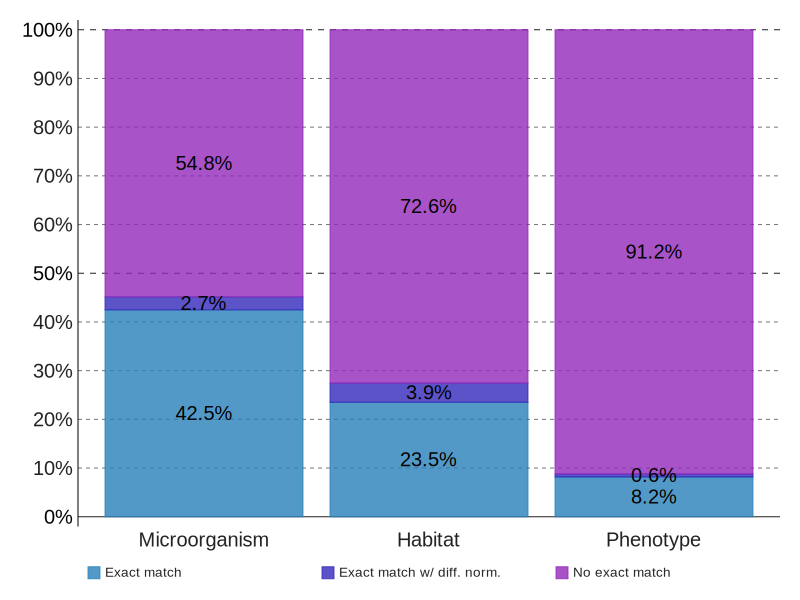

In [5]:
custom_style_small_legend = RotateStyle('#2980b9',
    value_label_font_size=20,
    background='transparent',
    font_family='Helvetica',
    label_font_size=20,
    legend_font_size=13.5,
    major_label_font_size=20,
    value_font_size=20,
    title_font_size=20,
    opacity='.8',
    opacity_hover='.9',
    transition='400ms ease-in')

exact = [1072, 830, 90]
diff_exact = [68,139,7]
no_match = [1384, 2562, 1005]
edn = [2524,3531,1102]

exact_percent = [100*a/b for a,b in zip(exact,edn)]
diff_exact_percent = [100*a/b for a,b in zip(diff_exact,edn)]
no_match_percent = [100*a/b for a,b in zip(no_match,edn)]

bar_chart = pygal.StackedBar(print_values=True, value_formatter=lambda x: "%.0f" % x + "%", style=custom_style_small_legend,
                             legend_at_bottom=True, legend_at_bottom_columns=3)
bar_chart.x_labels = ['Microorganism', 'Habitat', 'Phenotype']
bar_chart.add('Exact match', exact_percent, formatter=lambda x: "%.1f" % x + "%")  
bar_chart.add('Exact match w/ diff. norm.', diff_exact_percent, formatter=lambda x: "%.1f" % x + "%")
bar_chart.add('No exact match', no_match_percent, formatter=lambda x: "%.1f" % x + "%")

bar_chart.render_to_file('exact-match.svg')                         

display(SVG(bar_chart.render(disable_xml_declaration=True)))

cairosvg.svg2pdf(url='exact-match.svg', write_to='exact-match.pdf')


## Entity types

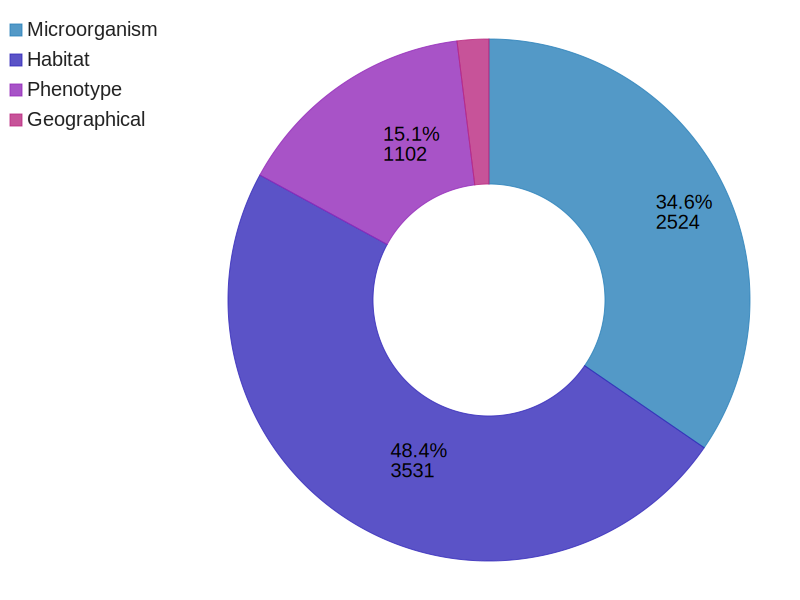

In [6]:
entities = ['Microorganism', 'Habitat', 'Phenotype', 'Geographical']
entity_counts = [2524, 3531, 1102, 143]
total_entities = sum(entity_counts)
entity_percents = map(lambda x: 100*x/total_entities, entity_counts)

pie_chart = pygal.Pie(print_values=True, print_labels=True, inner_radius=.4, style=custom_style, margin=10)

i = 0
for percent in entity_percents:
    pie_chart.add(entities[i], [{'value' : entity_counts[i], 'label' : (lambda x: "%.1f" % x + "%")(percent)}])
    i+=1

display(SVG(pie_chart.render(disable_xml_declaration=True)))

pie_chart.render_to_file('entity_pie_chart.svg')
cairosvg.svg2pdf(url='entity_pie_chart.svg', write_to='entity_pie_chart.pdf')